In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross, latlon_coords, interplevel
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import glob
import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
import matplotlib.gridspec as gridspec
import imageio

#Acceleration of gravity (constant) for converting to geopotential height
g = 9.8

#Latitude of first cross section point
lat1 = 43.0
#lat1 = 31.0

#Longitude of first cross section point
lon1 = -88.0
#lon1 = -81.0

# Latitude of second cross section point
lat2 = 42.5
#lat2 = 33.0

#Longitude of second cross section point
lon2 = -87.0
#lon2 = -79.0

data_ctrl = Dataset("/scratch/legetker/wdm_ctrl_run/wrfout_d02_1998-06-01_00:00:00", "r", format="NETCDF4")
data_1deg = Dataset("/scratch/legetker/wdm_1deg_delta/wrfout_d02_1998-06-01_00:00:00", "r", format="NETCDF4")
data_2deg = Dataset("/scratch/legetker/wdm_2deg_delta/wrfout_d02_1998-06-01_00:00:00", "r", format="NETCDF4")
data_4deg = Dataset("/scratch/legetker/wdm_4deg_delta/wrfout_d02_1998-06-01_00:00:00", "r", format="NETCDF4")

In [45]:

data_ctrl_start = Dataset("/scratch/legetker/wdm_ctrl_run/wrfout_d02_1998-05-31_00:00:00", "r", format="NETCDF4")
data_1deg_start = Dataset("/scratch/legetker/wdm_1deg_delta/wrfout_d02_1998-05-31_00:00:00", "r", format="NETCDF4")
data_2deg_start = Dataset("/scratch/legetker/wdm_2deg_delta/wrfout_d02_1998-05-31_00:00:00", "r", format="NETCDF4")
data_4deg_start = Dataset("/scratch/legetker/wdm_4deg_delta/wrfout_d02_1998-05-31_00:00:00", "r", format="NETCDF4")

lat_lon = [43.17111, -86.23685]
x_y = wrf.ll_to_xy(data_ctrl, lat_lon[0], lat_lon[1])
#x_y_1deg = wrf.ll_to_xy(data_1deg, lat_lon[0], lat_lon[1])
#x_y_2deg = wrf.ll_to_xy(data_2deg, lat_lon[0], lat_lon[1])
#x_y_4deg = wrf.ll_to_xy(data_4deg, lat_lon[0], lat_lon[1])

wdspd_ctrl = getvar(data_ctrl, "RAINNC").values
print(wdspd_ctrl.shape)
wdspd_1deg = getvar(data_1deg, "RAINNC").values
wdspd_2deg = getvar(data_2deg, "RAINNC").values
wdspd_4deg = getvar(data_4deg, "RAINNC").values



wdspd_ctrl = wdspd_ctrl[x_y[0],x_y[1]]
wdspd_1deg = wdspd_1deg[x_y[0],x_y[1]]
wdspd_2deg = wdspd_2deg[x_y[0],x_y[1]]
wdspd_4deg = wdspd_4deg[x_y[0],x_y[1]]


wdspd_ctrl_start = getvar(data_ctrl_start, "RAINNC").values
print(wdspd_ctrl.shape)
wdspd_1deg_start = getvar(data_1deg_start, "RAINNC").values
wdspd_2deg_start = getvar(data_2deg_start, "RAINNC").values
wdspd_4deg_start = getvar(data_4deg_start, "RAINNC").values



wdspd_ctrl_start = wdspd_ctrl_start[x_y[0],x_y[1]]
wdspd_1deg_start = wdspd_1deg_start[x_y[0],x_y[1]]
wdspd_2deg_start = wdspd_2deg_start[x_y[0],x_y[1]]
wdspd_4deg_start = wdspd_4deg_start[x_y[0],x_y[1]]

print(wdspd_ctrl_start - wdspd_ctrl)
print(wdspd_1deg_start - wdspd_1deg)
print(wdspd_2deg_start - wdspd_2deg)
print(wdspd_4deg_start - wdspd_4deg)


(276, 378)
()
-31.936283
-39.589775
-43.268906
-43.094006


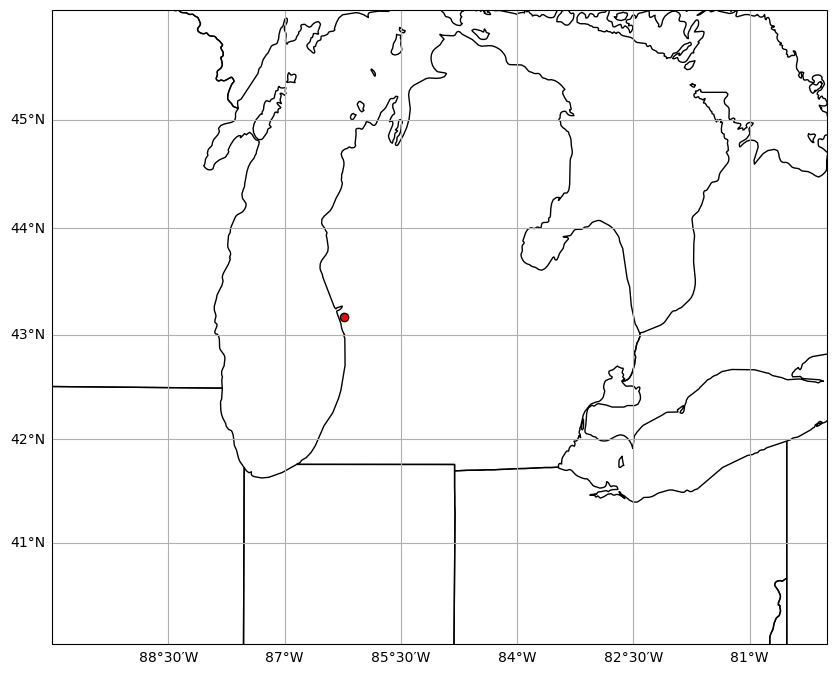

In [54]:
"""
Precip
"""
lats, lons = latlon_coords(rainnc)
time=wrf.extract_times(data_ctrl, timeidx=0, method='cat', squeeze=True, cache=None, meta=False, do_xtime=False)
timestr=(str(time))
titletime=(timestr[0:10]+' '+timestr[11:16])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
#cs = ax.contourf(lons, lats, rainnc, cmap = "jet", levels = np.arange(0, 150, 3), transform=ccrs.PlateCarree())
ax.scatter(lat_lon[1], lat_lon[0], color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black', facecolor = 'red')
#cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
#cbar = plt.colorbar(cs, cax = cax)
ax.set_extent([-90, -80, 40, 46])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels

In [34]:
data_ctrl = Dataset("/scratch/legetker/wdm_ctrl_run/wrfout_d02_1998-05-31_06:00:00", "r", format="NETCDF4")
data_1deg = Dataset("/scratch/legetker/wdm_1deg_delta/wrfout_d02_1998-05-31_06:00:00", "r", format="NETCDF4")
data_2deg = Dataset("/scratch/legetker/wdm_2deg_delta/wrfout_d02_1998-05-31_06:00:00", "r", format="NETCDF4")
data_4deg = Dataset("/scratch/legetker/wdm_4deg_delta/wrfout_d02_1998-05-31_06:00:00", "r", format="NETCDF4")

lat_lon = [43.5, -86.3]
x_y = wrf.ll_to_xy(data_ctrl, lat_lon[0], lat_lon[1])
#x_y_1deg = wrf.ll_to_xy(data_1deg, lat_lon[0], lat_lon[1])
#x_y_2deg = wrf.ll_to_xy(data_2deg, lat_lon[0], lat_lon[1])
#x_y_4deg = wrf.ll_to_xy(data_4deg, lat_lon[0], lat_lon[1])

wdspd_ctrl = getvar(data_ctrl, "wspd_wdir").values[0]
wdspd_1deg = getvar(data_1deg, "wspd_wdir").values[0]
wdspd_2deg = getvar(data_2deg, "wspd_wdir").values[0]
wdspd_4deg = getvar(data_4deg, "wspd_wdir").values[0]
"""
wdspd_ctrl = wdspd_ctrl[:,x_y[0],x_y[1]]
wdspd_1deg = wdspd_1deg[:,x_y[0],x_y[1]]
wdspd_2deg = wdspd_2deg[:,x_y[0],x_y[1]]
wdspd_4deg = wdspd_4deg[:,x_y[0],x_y[1]]
print(wdspd_ctrl)
"""
print(np.max(wdspd_ctrl[0]))
print(np.max(wdspd_1deg[0]))
print(np.max(wdspd_2deg[0]))
print(np.max(wdspd_4deg[0]))

[11.131869  13.427098  13.966742  14.795279  16.135965  17.333477
 18.419508  19.410362  19.886639  18.944124  16.946062  15.083135
 13.445312  11.867406  11.9441185 12.720471  17.54054   24.660511
 27.870754  29.338324  29.704487  31.779142  33.21173   31.675867
 29.970272  30.826498  32.58216   35.718357  39.67754   40.47922
 38.06963   34.847855  32.469616  31.437134  32.39023   35.959023
 39.77933   40.073112  38.76006   38.345818  39.062634  42.043686
 38.302956  32.94695   26.072115  18.312683  13.249685  11.155428
  7.7976108]
11.131869
13.381993
6.2113
11.742587


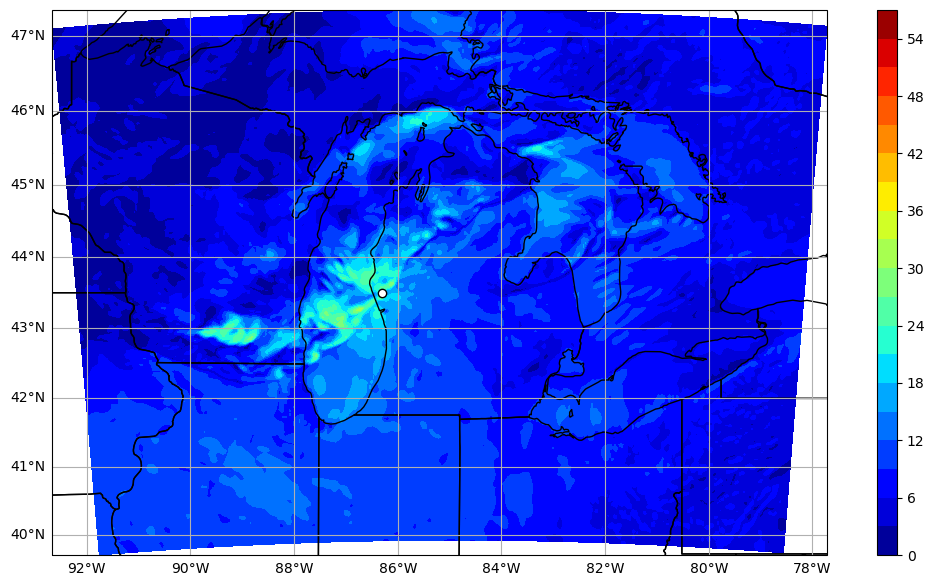

In [35]:
"""
wind speed
"""
wdspd_ctrl = getvar(data_ctrl, "wspd_wdir").values[0]
lats, lons = latlon_coords(rainnc)
time=wrf.extract_times(data_ctrl, timeidx=0, method='cat', squeeze=True, cache=None, meta=False, do_xtime=False)
timestr=(str(time))
titletime=(timestr[0:10]+' '+timestr[11:16])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
cs = ax.contourf(lons, lats, wdspd_ctrl[0,:,:], cmap = "jet", levels = np.arange(0, 60, 3), transform=ccrs.PlateCarree())
ax.scatter(lat_lon[1], lat_lon[0], color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
#ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels

In [3]:
files_ctrl = sorted(glob.glob("/scratch/legetker/wdm_ctrl_run/wrfout_d02*"))
files_1deg = sorted(glob.glob("/scratch/legetker/wdm_1deg_delta/wrfout_d02*"))
files_2deg = sorted(glob.glob("/scratch/legetker/wdm_2deg_delta/wrfout_d02*"))
files_4deg = sorted(glob.glob("/scratch/legetker/wdm_4deg_delta/wrfout_d02*"))



max_ctrl = []
max_1deg = []
max_2deg = []
max_4deg = []
times = []
for i in range(len(files_ctrl) - 12):
    
    data_ctrl = Dataset(files_ctrl[i], "r", format="NETCDF4")
    data_1deg = Dataset(files_1deg[i], "r", format="NETCDF4")
    data_2deg = Dataset(files_2deg[i], "r", format="NETCDF4")
    data_4deg = Dataset(files_4deg[i], "r", format="NETCDF4")
    
    time=wrf.extract_times(data_ctrl, timeidx=0, method='cat', squeeze=True, cache=None, meta=False, do_xtime=False)
    times.append(time)
    
    spd_ctrl = wdspd = getvar(data_ctrl, "wspd_wdir").values[0,0,:,:]
    spd_1deg = wdspd = getvar(data_1deg, "wspd_wdir").values[0,0,:,:]
    spd_2deg = wdspd = getvar(data_2deg, "wspd_wdir").values[0,0,:,:]
    spd_4deg = wdspd = getvar(data_4deg, "wspd_wdir").values[0,0,:,:]
    
    max_ctrl.append(np.max(spd_ctrl) * 1.94)
    max_1deg.append(np.max(spd_1deg) * 1.94)
    max_2deg.append(np.max(spd_2deg) * 1.94)
    max_4deg.append(np.max(spd_4deg) * 1.94)
    
print(max_ctrl)
    

[26.374472579956056, 28.521784992218016, 28.417169494628904, 27.08909568786621, 26.372143268585205, 26.44537874221802, 25.13942506790161, 24.0436940574646, 24.07487796783447, 31.655833663940427, 30.2837638092041, 22.442879905700682, 19.03453493118286, 20.61810773849487, 25.86833116531372, 27.546047744750975, 31.11194408416748, 23.312508602142334, 25.035880794525145, 32.98652355194092, 51.56262077331543, 56.805436286926266, 60.670194931030274, 47.08400810241699, 33.44845245361328, 33.481018409729, 56.26143939971924, 64.44301330566407, 61.12623672485351, 64.81152183532714, 61.73426284790039, 61.74621837615967, 55.196172599792476, 58.64541835784912, 68.53369110107421, 51.0806549835205, 43.5065669631958, 50.94225059509277, 64.63041648864746, 46.84360984802246, 60.991902618408204, 65.64310264587402, 34.51964336395264, 48.31984191894531, 59.05485912322998, 78.80304214477539, 65.19315147399902, 62.34407989501953, 53.13381622314453, 40.391853981018066, 35.61969627380371, 34.64318382263183, 30.

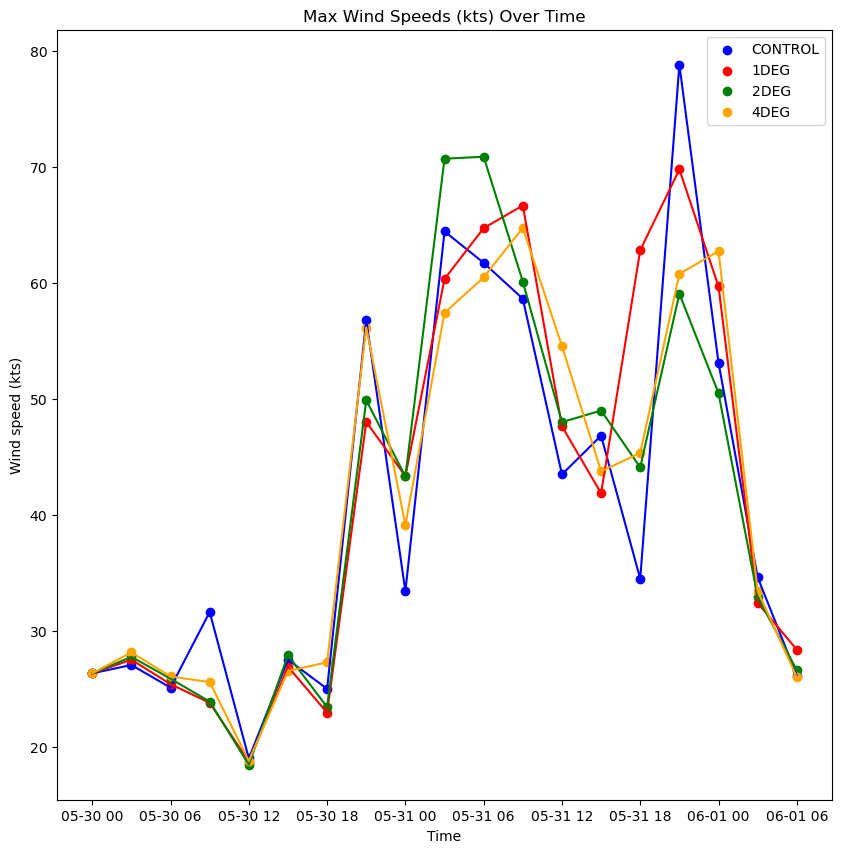

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

plt.scatter(times[0::3], max_ctrl[0::3], label = "CONTROL", color = "blue")
plt.plot(times[0::3], max_ctrl[0::3], color = "blue")

plt.scatter(times[0::3], max_1deg[0::3], label = "1DEG", color = "red")
plt.plot(times[0::3], max_1deg[0::3], color = "red")

plt.scatter(times[0::3], max_2deg[0::3], label = "2DEG", color = "green")
plt.plot(times[0::3], max_2deg[0::3], color = "green")

plt.scatter(times[0::3], max_4deg[0::3], label = "4DEG", color = "orange")
plt.plot(times[0::3], max_4deg[0::3], color = "orange")

plt.title("Max Wind Speeds (kts) Over Time")
plt.xlabel("Time")
plt.ylabel("Wind speed (kts)")
plt.legend()

In [5]:
print(np.mean(max_ctrl))
print(np.mean(max_1deg))
print(np.mean(max_2deg))
print(np.mean(max_4deg))

42.599689568953075
43.48377368684248
43.01655462958596
42.92180684107
